In [4]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [9]:
# encoder rész

# MNIST: 28x28
input_img = Input(shape=(28,28,1))

# encoder
x = Convolution2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# modell az encoder-re
encoder = Model(inputs = input_img, outputs = encoded)

encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0   

In [11]:
# decoder rész
x = Convolution2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Convolution2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Convolution2D(16, (3,3), activation='relu')(x) # 28x28-as kimenet
x = UpSampling2D((2,2))(x)
decoded = Convolution2D(1, (3,3), activation='sigmoid', padding='same')(x)



In [14]:
# modell a teljes AutoEncoder-re
autoencoder = Model(inputs = input_img, outputs = decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0   

In [15]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [18]:
autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.2136 - val_loss: 0.1751
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1594 - val_loss: 0.1493
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1444 - val_loss: 0.1404
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1369 - val_loss: 0.1314
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.1323 - val_loss: 0.1257
Epoch 6/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.1287 - val_loss: 0.1291
Epoch 7/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.1260 - val_loss: 0.1283
Epoch 8/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.1235 - val_loss: 0.1241
Epoch 9/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1214 - val_lo

In [19]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=autoencoder.predict(x_test)

In [20]:
print(encoded_imgs.shape)

(10000, 4, 4, 8)


C:\Users\Dani\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


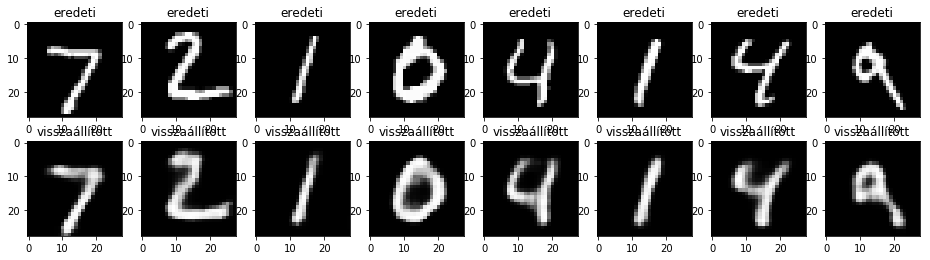

In [21]:
# eredeti és visszaállított képek
n = 8
plt.figure(figsize=(16,4))
for i in range(n):
  # eredeti
    ax = plt.subplot(2, n, i + 1)
    ax.set_title('eredeti')
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.grid('False')

  # visszaállított
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title('visszaállított')
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.grid('False')

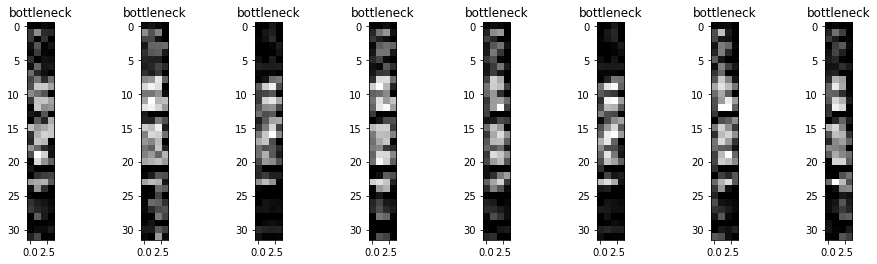

In [23]:
# encoder utáni képek, bottleneck
n = 8
plt.figure(figsize=(16,4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    ax.set_title('bottleneck')
    plt.imshow(encoded_imgs[i].reshape(4, 4*8).T)
    plt.gray()
    ax.grid('False')

In [26]:
#denoising

#bemenet+zaj

x_train_noisy = x_train+0.7*np.random.normal(size=x_train.shape)
x_test_noisy = x_test+0.7*np.random.normal(size=x_test.shape)

#0-1 közé
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)


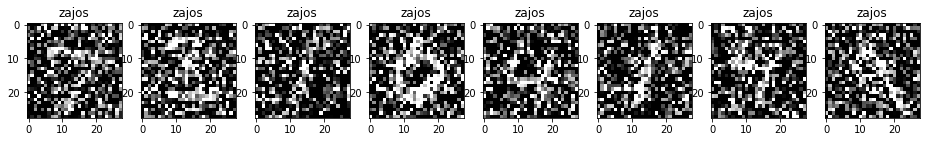

In [27]:
n = 8
plt.figure(figsize=(16,4))
for i in range(n):
  # eredeti
    ax = plt.subplot(1, n, i + 1)
    ax.set_title('zajos')
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.grid('False')

In [28]:
#bemenet zajos
#kimenet eredeti

autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.1789 - val_loss: 0.1706
Epoch 2/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.1649 - val_loss: 0.1595
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.1610 - val_loss: 0.1570
Epoch 4/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.1583 - val_loss: 0.1618
Epoch 5/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.1568 - val_loss: 0.1524


In [29]:
decoded_imgs=autoencoder.predict(x_test_noisy)

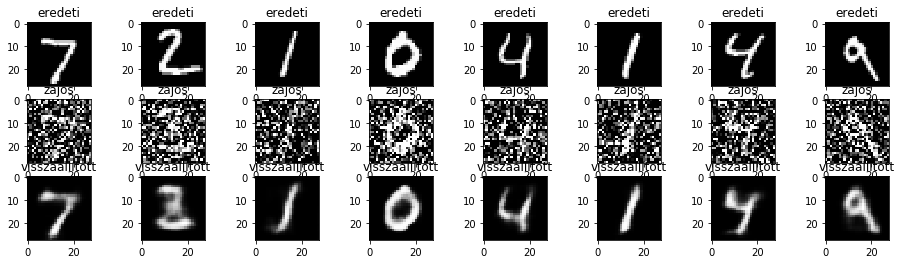

In [31]:
n = 8
plt.figure(figsize=(16,4))
for i in range(n):
    # eredeti
    ax = plt.subplot(3, n, i + 1)
    ax.set_title('eredeti')
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.grid('False')
    
    ax = plt.subplot(3, n, i + 1 + n)
    ax.set_title('zajos')
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.grid('False')
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.set_title('visszaállított')
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.grid('False')

In [32]:
# fraud detection (csalás detekció banki tranzakciók alapján)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv('creditcard.csv')

In [37]:
df.shape

(284807, 31)

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
df.isnull().values.any()

False

In [41]:
# csalás és normál aránya
frauds=df[df.Class==1]
normal=df[df.Class==0]
print('normál:',normal.shape,'csalás:',frauds.shape)

normál: (284315, 31) csalás: (492, 31)


In [43]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [44]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

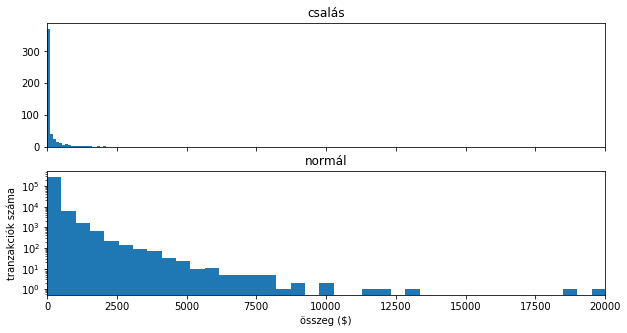

In [49]:
#hisztogrammon
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))

ax1.hist(frauds.Amount, bins=20)
ax1.set_title('csalás')

ax2.hist(normal.Amount, bins=50)
ax2.set_title('normál')

plt.xlabel('összeg ($)')
plt.ylabel('tranzakciók száma')
plt.xlim((0, 20000))
plt.yscale('log')

Text(0, 0.5, 'Összeg')

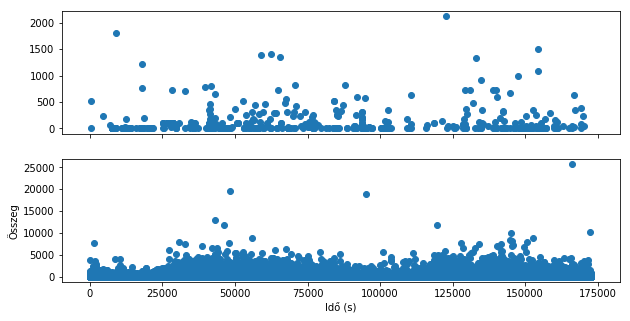

In [50]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,5))

ax1.scatter(frauds.Time, frauds.Amount)
ax2.scatter(normal.Time, normal.Amount)

plt.xlabel('Idő (s)')
plt.ylabel('Összeg')

In [51]:
df = df.drop('Time', axis = 1)

In [55]:
X = df.drop('Class', axis=1).values
Y = df['Class'].values

In [56]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [58]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.1)

In [59]:
x_train.shape

(256326, 29)

In [60]:
# autoencoder
data_in = Input(shape=(29,))
encoded = Dense(2, activation='tanh')(data_in)
decoded = Dense(29, activation='sigmoid')(encoded)

autoencoder = Model(data_in, decoded)

In [62]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
autoencoder.fit(x_train, x_train,
epochs = 5,
batch_size = 128,
validation_data = (x_test, x_test))

Train on 256326 samples, validate on 28481 samples
Epoch 1/5
256326/256326 [==============================] - 8s 30us/step - loss: 0.0065 - val_loss: 0.0020
Epoch 2/5
256326/256326 [==============================] - 6s 23us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/5
256326/256326 [==============================] - 6s 24us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/5
256326/256326 [==============================] - 6s 24us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/5
256326/256326 [==============================] - 6s 24us/step - loss: 0.0017 - val_loss: 0.0017


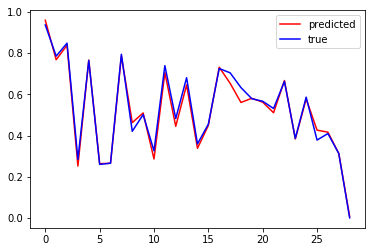

In [65]:
pred=autoencoder.predict(x_test[0:10])
plt.plot(pred[9],'r')
plt.plot(x_test[9], 'b')
plt.legend(['predicted','true'])

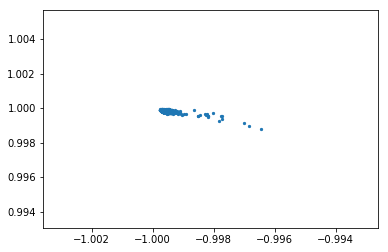

In [68]:
encoder = Model(data_in, encoded)
enc = encoder.predict(x_test)
scatter = plt.scatter(enc[:, 0], enc[:, 1], s=5.0)

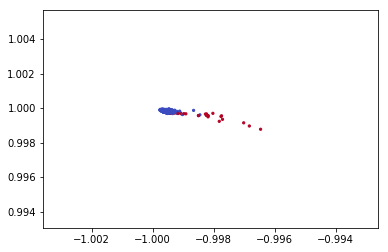

In [71]:
scatter = plt.scatter(enc[:, 0], enc[:, 1], c=y_test, cmap='coolwarm',  s=5.0)